In [8]:
#!/usr/bin/python3
#
###
# Copyright 2022 University of Luxembourg
#
#  Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#   https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#
###
# Author: André Stemper (andre.stemper@uni.lu)
###

"""
This script adds gaussian noise to all latent noiseless temperature data in 
data.csv and stores the resulting discrete data as data_with_gaussian_noise.csv 
"""

import pandas as pd
import numpy as np 
import os

# gaussian noise parameters
mu, sigma = 0, 0.1 

# path to input file
path ='.'

# Please not that on earlier simulations the latent and discretized headers where exchanged!
latent_temperatures = ['T0 [°C]', 'T1 [°C]', 'T2 [°C]', 'T3 [°C]', 'T4 [°C]', 'T5 [°C]', 'T6 [°C]', 'T7 [°C]', 'T8 [°C]']
discretized_temperatures = ['T0_latent [°C]', 'T1_latent [°C]', 'T2_latent [°C]', 'T3_latent [°C]', 'T4_latent [°C]', \
    'T5_latent [°C]', 'T6_latent [°C]', 'T7_latent [°C]', 'T8_latent [°C]']

temperature_dataframe = pd.read_csv(path+os.sep+'data.csv', header=0, sep=";")
noise = np.random.normal(mu, sigma, [len(temperature_dataframe.index),len(latent_temperatures)])
temperature_dataframe[latent_temperatures] = temperature_dataframe[latent_temperatures] + noise

def discretize(x, resolution=1.0):
    return ((((x+0.5*resolution)*resolution).astype(float)).astype(int)).astype(float) /resolution

temperature_dataframe[discretized_temperatures] = discretize(temperature_dataframe[latent_temperatures])
temperature_dataframe.to_csv(path_or_buf=path+os.sep+'data_with_gaussian_noise.csv', sep=';')


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

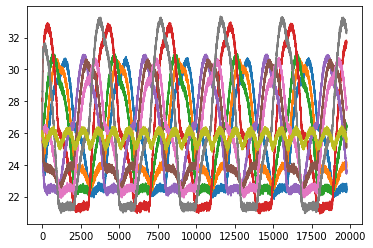

In [9]:
plt.plot(temperature_dataframe[latent_temperatures])

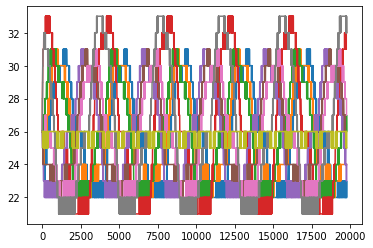

In [10]:
plt.plot(temperature_dataframe[discretized_temperatures])